In [1]:
from label_names import *
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image,ImageFilter

path = os.getcwd()
if path.split('/')[-1] == 'notebooks':
    os.chdir('..')
    
from src.engine import Engine
from src.core.criterions import *
from src.utils.util import *
from src.core.datasets import *
from src.core.models import resnet
from torch.utils.data import DataLoader

import torchvision
%matplotlib inline

In [4]:
#model = resnet.resnet50(pretrained=True)
model = torchvision.models.resnet50(pretrained=True)

In [5]:
trans = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),]
)


imagenet_val  = torchvision.datasets.ImageNet('/data/opensets/imagenet-pytorch', 
                                                split='val',
                                                transform = trans)

In [7]:
img, label = imagenet_val[0]

print(torch.argmax(model(img.unsqueeze(0))), )

tensor(600)


In [8]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

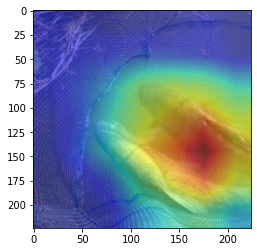

In [28]:
target_layers = [model.layer4[-1]]
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
targets = [ClassifierOutputTarget(0)]

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=img.unsqueeze(0)).squeeze()
plt.imshow(img.permute(1,2,0)*torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406]))
plt.imshow(grayscale_cam,cmap='jet',alpha=0.5)